**ASSESSMENT 1**

1. Import pandas and read in the banklist.csv file into a dataframe called
banks.

In [15]:
import pandas as pd

In [16]:
banks = pd.read_csv('banklist.csv')
banks

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,26-Jul-17
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,18-May-17
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17
...,...,...,...,...,...,...,...
548,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",27-Jul-01,19-Aug-14
549,Malta National Bank,Malta,OH,6629,North Valley Bank,3-May-01,18-Nov-02
550,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2-Feb-01,18-Feb-03
551,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,14-Dec-00,17-Mar-05


2. Show the head of the dataframe.


In [17]:
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,26-Jul-17
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,18-May-17
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17


3. What are the column names?


In [18]:
banks.columns

Index(['Bank Name', 'City', 'ST', 'CERT', 'Acquiring Institution',
       'Closing Date', 'Updated Date'],
      dtype='object')

4. How many States (ST) are represented in this data set?

In [19]:
banks['ST'].nunique()

44

5. Get a list or array of all the states in the data set.

In [20]:
banks.ST.unique()

array(['IL', 'WI', 'LA', 'UT', 'NJ', 'AR', 'GA', 'PA', 'TN', 'WA', 'CO',
       'PR', 'FL', 'MN', 'CA', 'MD', 'OK', 'OH', 'SC', 'VA', 'ID', 'TX',
       'CT', 'AZ', 'NV', 'NC', 'KY', 'MO', 'KS', 'AL', 'MI', 'IN', 'IA',
       'NE', 'MS', 'NM', 'OR', 'NY', 'MA', 'SD', 'WY', 'WV', 'NH', 'HI'],
      dtype=object)

6. What are the top 5 states with the most failed banks?


In [21]:
banks.groupby('ST').count().sort_values('Bank Name',ascending=False).iloc[:5] ['Bank Name']

,Bank Name
ST,
GA,93
FL,75
IL,68
CA,41
MN,23


7. What are the top 5 acquiring institutions?

In [22]:
banks.groupby('Acquiring Institution').count().sort_values('Bank Name', ascending=False).iloc[:5]['Bank Name']

,Bank Name
Acquiring Institution,
No Acquirer,31
State Bank and Trust Company,12
First-Citizens Bank & Trust Company,11
Ameris Bank,10
U.S. Bank N.A.,9


8. How many banks has the State Bank of Texas acquired? How many of
them were actually in Texas?

In [23]:
acquirers = banks[banks['Acquiring Institution'] == 'State Bank of Texas']
acquirers

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17
21,The National Republic Bank of Chicago,Chicago,IL,916,State Bank of Texas,24-Oct-14,6-Jan-16
450,Millennium State Bank of Texas,Dallas,TX,57667,State Bank of Texas,2-Jul-09,26-Oct-12


9. What is the most common city in California for a bank to fail in?

In [24]:
banks[banks['ST'] == 'CA'].groupby('City').count().sort_values('Bank Name', ascending=False).iloc[:1]

,Bank Name,ST,CERT,Acquiring Institution,Closing Date,Updated Date
City,,,,,,
Los Angeles,4,4,4,4,4,4


**Assessment 2**

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
Automobiles = pd.read_csv('historical_automobile_sales.csv')
Automobiles

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


Q 1: Develop a Line chart using the functionality of pandas to show how
automobile sales fluctuate from year to year.

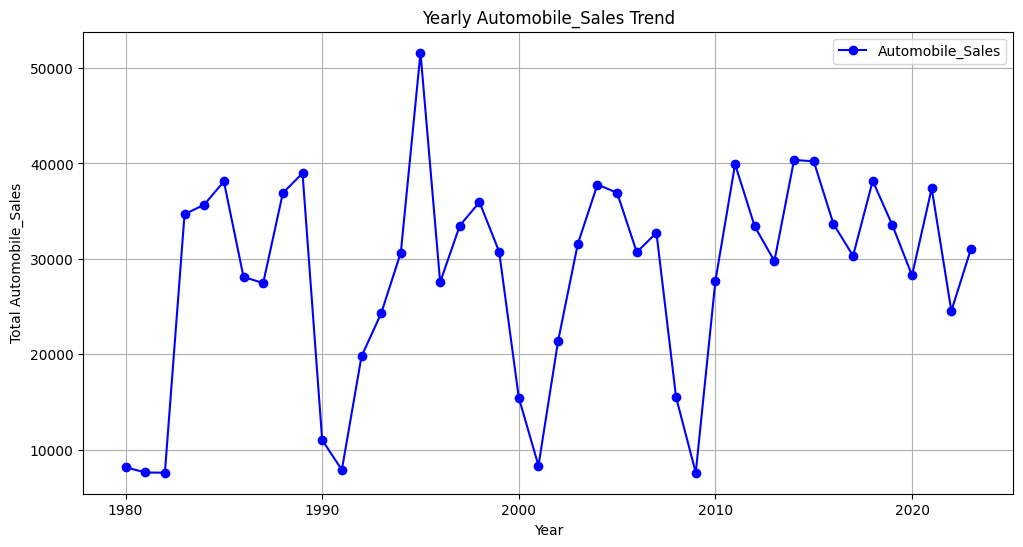

In [27]:
sales_per_year = Automobiles.groupby("Year")["Automobile_Sales"].sum()
plt.figure(figsize=(12, 6))
plt.plot(sales_per_year.index, sales_per_year.values, marker='o', linestyle='-', color='b', label="Automobile_Sales")
plt.xlabel("Year")
plt.ylabel("Total Automobile_Sales")
plt.title("Yearly Automobile_Sales Trend")
plt.legend()
plt.grid(True)
plt.show()

Q 2: Plot different lines for categories of vehicle type and analyze the trend
to answer the question Is there a noticeable difference in sales trends
between different vehicle types during recession periods?

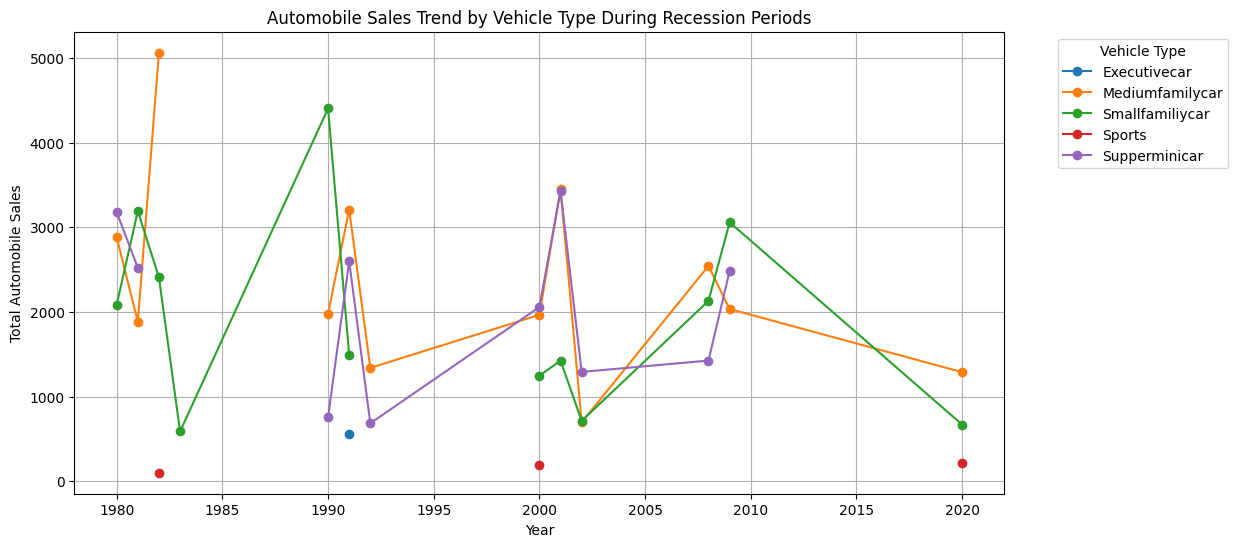

In [28]:
Automobiles["Date"] = pd.to_datetime(Automobiles["Date"])
recession_data = Automobiles[Automobiles["Recession"] == 1]
sales_by_vehicle_type = recession_data.groupby(["Year", "Vehicle_Type"])["Automobile_Sales"].sum().unstack()
plt.figure(figsize=(12, 6))
for vehicle_type in sales_by_vehicle_type.columns:
    plt.plot(sales_by_vehicle_type.index, sales_by_vehicle_type[vehicle_type], marker='o', linestyle='-', label=vehicle_type)
plt.xlabel("Year")
plt.ylabel("Total Automobile Sales")
plt.title("Automobile Sales Trend by Vehicle Type During Recession Periods")
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Q 3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non- recession period.

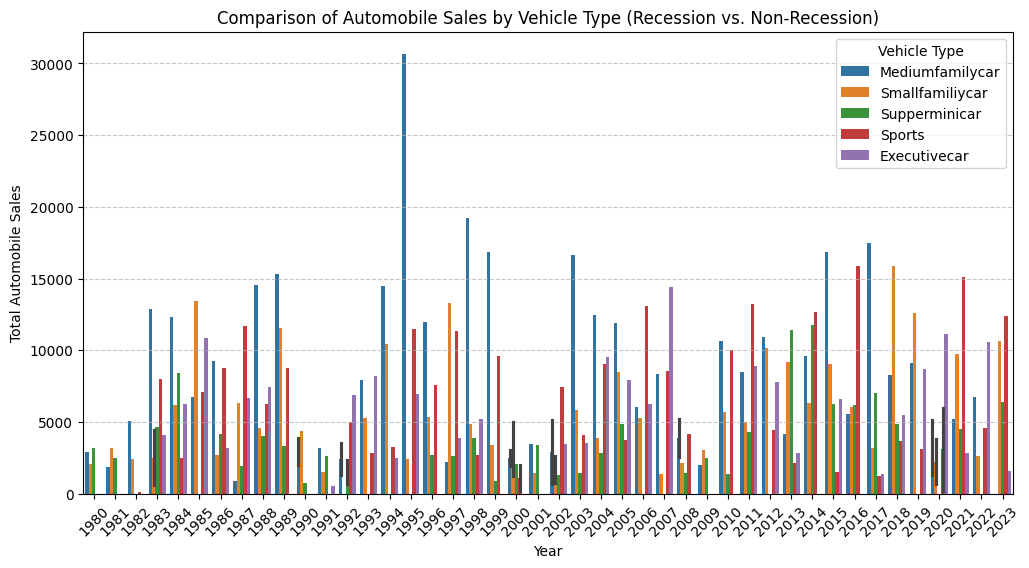

In [29]:
Automobiles["Date"] = pd.to_datetime(Automobiles["Date"])
sales_by_vehicle_type = Automobiles.groupby(["Year", "Vehicle_Type", "Recession"])
sales_by_vehicle_type = sales_by_vehicle_type["Automobile_Sales"].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_vehicle_type, x="Year", y="Automobile_Sales", hue="Vehicle_Type")
plt.xlabel("Year")
plt.ylabel("Total Automobile Sales")
plt.title("Comparison of Automobile Sales by Vehicle Type (Recession vs. Non-Recession)")
plt.legend(title="Vehicle Type")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Q 4: Now you want to compare the sales of different vehicle types
during a recession and a non-recession period.

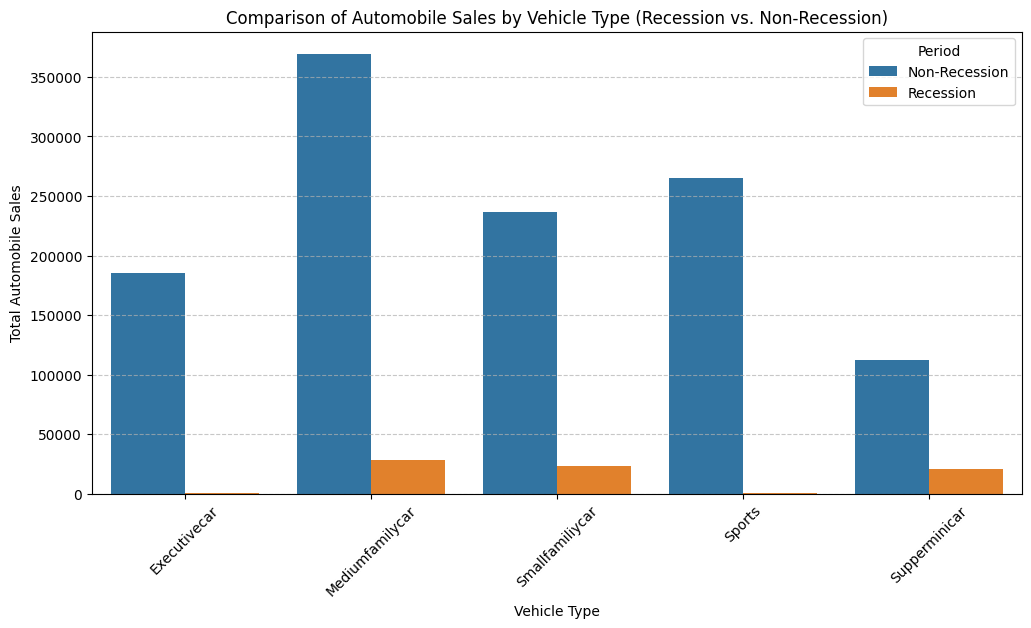

In [30]:
Automobiles["Date"] = pd.to_datetime(Automobiles["Date"])
sales_by_vehicle_type = Automobiles.groupby(["Vehicle_Type", "Recession"])
sales_by_vehicle_type = sales_by_vehicle_type["Automobile_Sales"].sum().reset_index()
sales_by_vehicle_type["Recession"] = sales_by_vehicle_type["Recession"].map({0: "Non-Recession", 1: "Recession"})
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_vehicle_type, x="Vehicle_Type", y="Automobile_Sales", hue="Recession")
plt.xlabel("Vehicle Type")
plt.ylabel("Total Automobile Sales")
plt.title("Comparison of Automobile Sales by Vehicle Type (Recession vs. Non-Recession)")
plt.legend(title="Period")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()